In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

In [53]:
# Task 1: Load the dataset using pandas
df = pd.read_csv('creditcard.csv') 


In [54]:
# Task 2: Perform missing value analysis
missing_values = df.isnull().sum()
missing_values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [55]:


# Handle missing values by filling with the mean of each column
df.fillna(df.mean(), inplace=True)

In [56]:
# Task 3: Calculate the number of genuine and fraud transactions
num_genuine = df['Class'].value_counts()[0]
num_fraud = df['Class'].value_counts()[1]
percent_fraud = (num_fraud / (num_genuine + num_fraud)) * 100


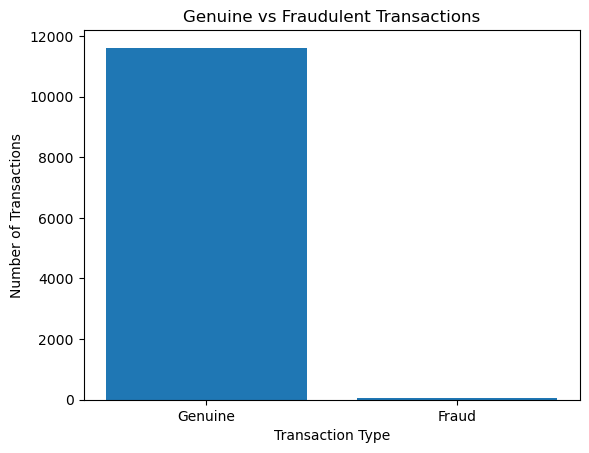

In [57]:
# Task 4: Visualize genuine and fraudulent transactions
plt.bar(['Genuine', 'Fraud'], [num_genuine, num_fraud])
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Genuine vs Fraudulent Transactions')
plt.show()

In [58]:
# Task 5: Normalize the 'Amount' column
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [59]:
# Task 6: Split the dataset into train and test sets
X = df.drop(['Class'], axis=1)
y = df['Class']



In [60]:
# Task 7: Train Decision Tree and Random Forest models
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Task 8: Compare predictions of both models
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)



In [62]:
 #Drop rows with missing values from y_true
y_test = y_test.dropna().reset_index(drop=True)

# Update X_test accordingly
X_test = X_test[y_test.index]

# Ensure predictions have the same length as true labels
dt_predictions = dt_predictions[:len(y_test)]
rf_predictions = rf_predictions[:len(y_test)]

In [63]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [64]:
# Task 10: Check performance metrics of both models
dt_report = classification_report(y_test, dt_predictions)
rf_report = classification_report(y_test, rf_predictions)

print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("\nDecision Tree Classification Report:\n", dt_report)
print("\nRandom Forest Classification Report:\n", rf_report)

Decision Tree Accuracy: 0.9988568162332095
Random Forest Accuracy: 0.9994284081166047

Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3482
         1.0       0.88      0.88      0.88        17

    accuracy                           1.00      3499
   macro avg       0.94      0.94      0.94      3499
weighted avg       1.00      1.00      1.00      3499


Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3482
         1.0       1.00      0.88      0.94        17

    accuracy                           1.00      3499
   macro avg       1.00      0.94      0.97      3499
weighted avg       1.00      1.00      1.00      3499

